## Temperature

### 1884-1930

The rate of change of the annual average temperature is 0.00951 ± 0.00506 °C
95% Confidence Interval for the slope: (-0.00, 0.02)
T statistic 1.8796703334415914
P-value 0.06678504067473212
Z-score 1.8796703334415914


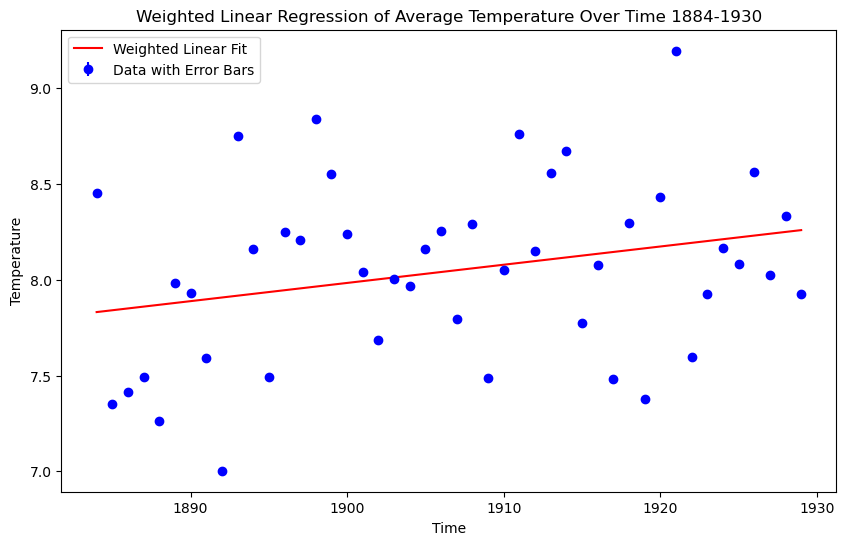

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

tas_array = np.array(data['tas'])
time = np.arange(1884, 1930)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[:46]
err = 0.001

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression with weights (inverse of the square of error)
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the weighted regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f})')

# Calculate t-statistic, p-value, and z-score
t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Temperature Over Time 1884-1930')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1930-1980

The rate of change of the annual average temperature is -0.00542 ± 0.00409 °C
95% Confidence Interval for the slope: (-0.01, 0.00)
T statistic -1.325627911826015
P-value 0.19123770625825753
Z-score -1.325627911826015


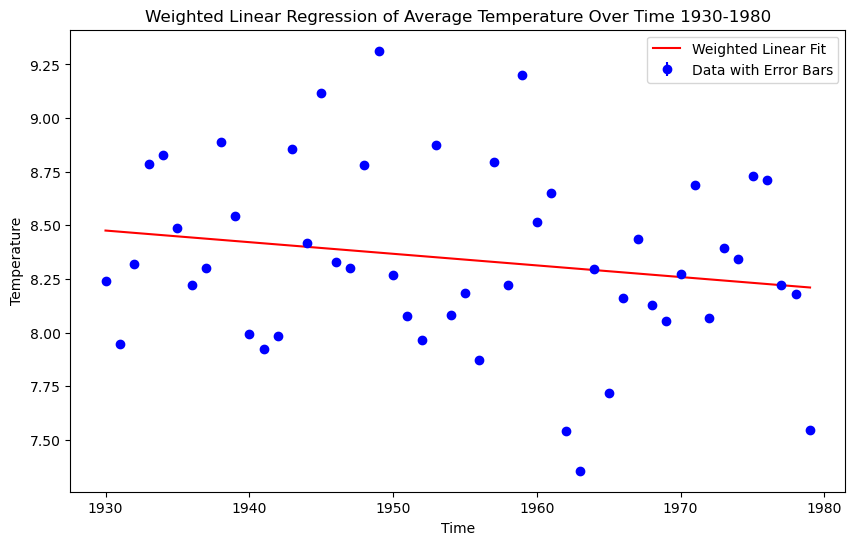

In [19]:
tas_array = np.array(data['tas'])
time = np.arange(1930, 1980)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[46:96]
err = 0.001

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression with weights (inverse of the square of error)
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the weighted regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f})')

# Calculate t-statistic, p-value, and z-score
t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Temperature Over Time 1930-1980')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1980-2022

The rate of change of the annual average temperature is 0.02983 ± 0.00559 °C
95% Confidence Interval for the slope: (0.02, 0.04)
T statistic 5.334505247209727
P-value 3.802067152225419e-06
Z-score 5.334505247209727


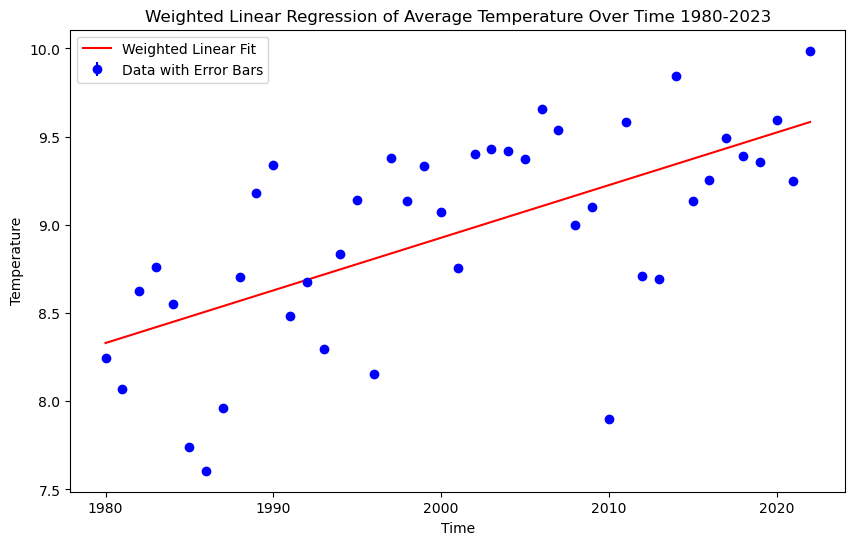

In [20]:
tas_array = np.array(data['tas'])
time = np.arange(1980, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[96:]
err = 0.001

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression with weights (inverse of the square of error)
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the weighted regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f})')

# Calculate t-statistic, p-value, and z-score
t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Temperature Over Time 1980-2023')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1990-2022

The rate of change of the annual average temperature is 0.02116 ± 0.00797 °C
95% Confidence Interval for the slope: (0.00, 0.04)
T statistic 2.6533561249198656
P-value 0.012456706778065652
Z-score 2.6533561249198656


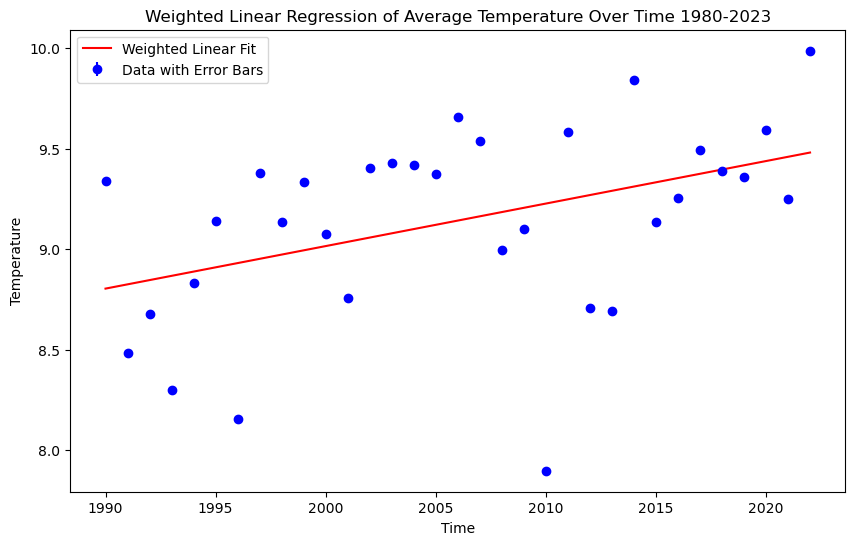

In [21]:
tas_array = np.array(data['tas'])
time = np.arange(1990, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[106:]
err = 0.001

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression with weights (inverse of the square of error)
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the weighted regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f})')

# Calculate t-statistic, p-value, and z-score
t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Temperature Over Time 1980-2023')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


## Minimum Temperature

### 1884-1930

The rate of change of the annual average temperature is 0.01182 ± 0.00480 °C
95% Confidence Interval for the slope: (0.00, 0.02) °C
T statistic 2.465420264206317
P-value 0.017656781268394317
Z-score 2.465420264206317


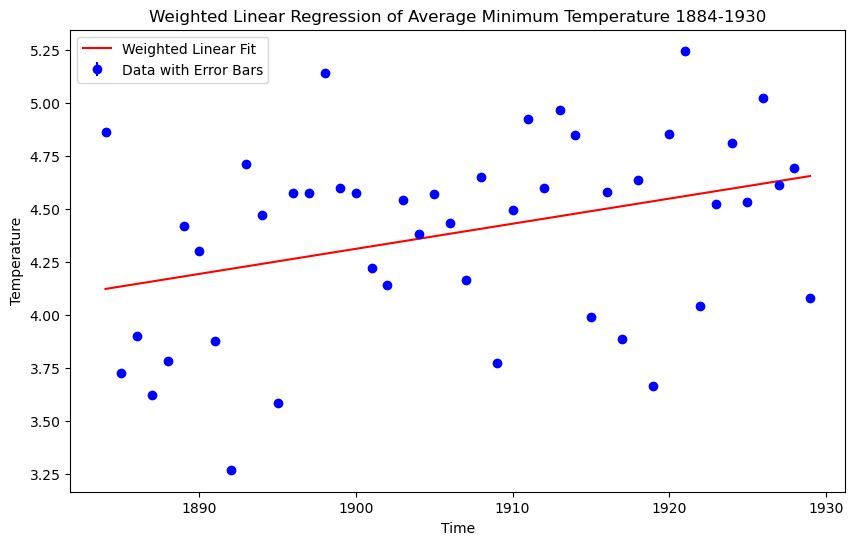

In [22]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

# Extract variables
tas_array = np.array(data['tasmin'])
time = np.arange(1884, 1930)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[:46]

err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Minimum Temperature 1884-1930')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1930-1950

The rate of change of the annual average temperature is -0.00304 ± 0.00356 °C
95% Confidence Interval for the slope: (-0.01, 0.00) °C
T statistic -0.8540894803572908
P-value 0.39729797284086166
Z-score -0.8540894803572908


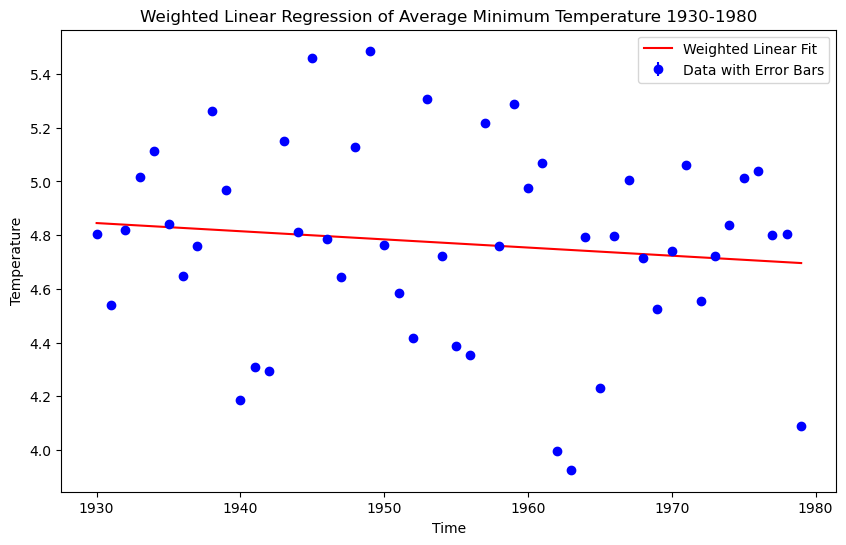

In [24]:
tas_array = np.array(data['tasmin'])
time = np.arange(1930, 1980)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[46:96]

err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Minimum Temperature 1930-1980')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1980-2022

The rate of change of the annual average temperature is 0.02506 ± 0.00531 °C
95% Confidence Interval for the slope: (0.01, 0.04) °C
T statistic 4.7209254566885805
P-value 2.7393492955996024e-05
Z-score 4.7209254566885805


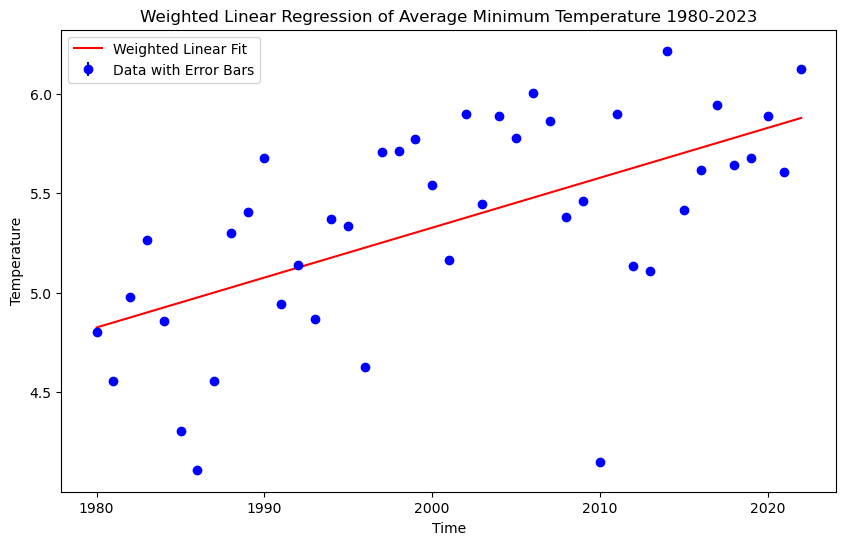

In [25]:
tas_array = np.array(data['tasmin'])
time = np.arange(1980, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[96:]

err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Minimum Temperature 1980-2023')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 1990-2022

The rate of change of the annual average temperature is 0.01601 ± 0.00774 °C
95% Confidence Interval for the slope: (0.00, 0.03) °C
T statistic 2.0685340179793
P-value 0.04701778524240918
Z-score 2.0685340179793


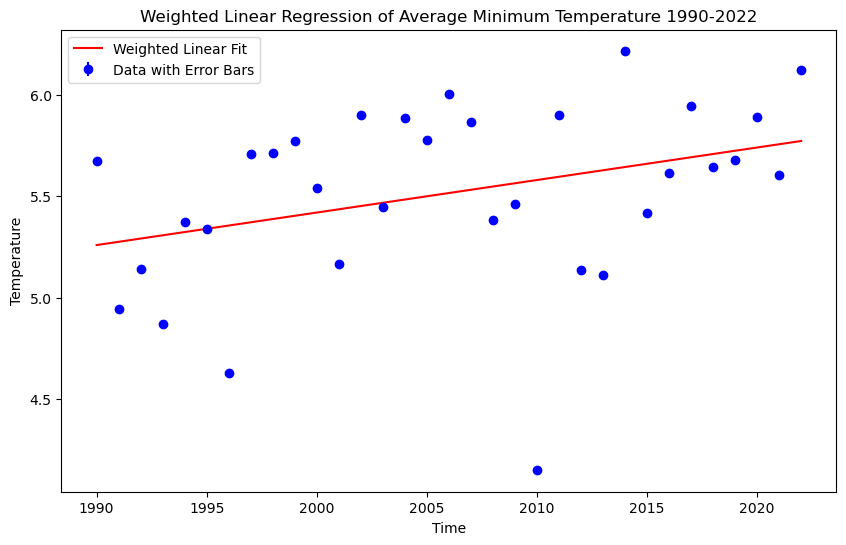

In [26]:
tas_array = np.array(data['tasmin'])
time = np.arange(1990, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[106:]

err = 0.002

X_with_constant = sm.add_constant(time)

# Performing Ordinary Least Squares regression
weights = 1 / np.square(err)
model = sm.WLS(temp, X_with_constant, weights=weights)
results = model.fit()

# Extracting information from the regression results
slope = results.params[1]  # Index 1 corresponds to the slope coefficient
intercept = results.params[0]  # Index 0 corresponds to the intercept
slope_error = results.bse[1]
intercept_error = results.bse[0]

print(f'The rate of change of the annual average temperature is {slope:.5f} ± {slope_error:.5f} °C')
conf_int = results.conf_int(alpha=0.05)  
lower_bound, upper_bound = conf_int[1] 
print(f'95% Confidence Interval for the slope: ({lower_bound:.2f}, {upper_bound:.2f}) °C')

t_statistic = results.tvalues[1]  # Index 1 corresponds to the slope coefficient
degrees_of_freedom = len(temp) - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

slope = results.params[1]
null_hypothesis_value = 0
z_score = (slope - null_hypothesis_value) / results.bse[1]

print('T statistic', t_statistic)
print('P-value', p_value)
print('Z-score', z_score)

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line
plt.plot(time, results.fittedvalues, color='red', label='Weighted Linear Fit')

plt.title('Weighted Linear Regression of Average Minimum Temperature 1990-2022')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
